In [2]:
# use closed form solution for small size of data 
# avoid extra computation to gen theta
# inv(X.T.X)*(X.T.Y)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

In [8]:
X,Y = make_regression(n_samples=400,n_features=1,n_informative=1,noise=1.8,random_state=11)
X.shape,Y.shape

((400, 1), (400,))

In [11]:
Y=Y.reshape((-1,1))
Y.shape
X.shape

(400, 1)

In [15]:
X=(X-np.mean(X,axis=0))/np.std(X,axis=0)


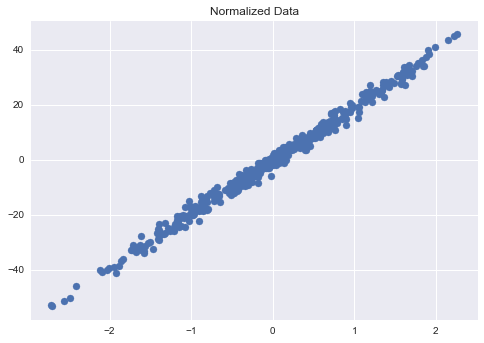

In [20]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.title('Normalized Data')
plt.show()

In [22]:
ones = np.ones((X.shape[0],1))
X_ = np.hstack((X,ones))
print(X_.shape)
print(X_[:5,:])

(400, 2)
[[-0.86881353  1.        ]
 [ 1.04796658  1.        ]
 [-0.2019676   1.        ]
 [-0.34017061  1.        ]
 [ 0.13317349  1.        ]]


In [23]:
def predict(X,theta):
    return np.dot(X,theta)

def getThetaClosedForm(X,Y):
    X = np.mat(X)
    Y = np.mat(Y)
    firstPart = np.dot(X.T,X)
    secondPart = np.dot(X.T,Y)
    
    theta = np.linalg.pinv(firstPart)*secondPart
    return theta

In [24]:
theta = getThetaClosedForm(X_,Y)
print(theta)

[[19.45877082]
 [-0.29187892]]


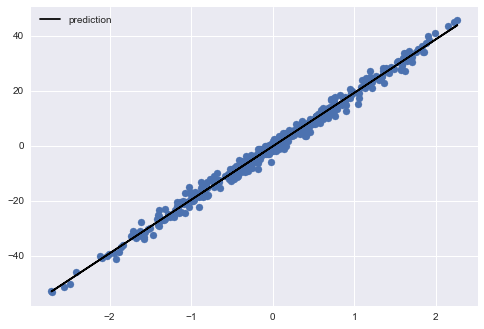

In [36]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X,predict(X_,theta),color='k',label="prediction")
plt.legend()
plt.show()